In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("employee_attrition_dataset_900.csv")
df

,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance,attrition
0,23,male,Tech,Master,24,72618,married,yes,good,0
1,49,male,Tech,Master,1,133260,single,yes,poor,0
2,55,female,Sales,Master,33,145733,married,no,good,0
3,59,male,Tech,High School,27,59910,married,no,good,0
4,38,female,Tech,Bachelor,23,20311,married,yes,good,0
...,...,...,...,...,...,...,...,...,...,...
895,54,female,Sales,PhD,4,126298,married,no,excellent,0
896,57,male,Operations,High School,16,59522,single,yes,good,0
897,40,male,Tech,Bachelor,23,131855,married,no,poor,1
898,25,female,Tech,Bachelor,0,95018,married,yes,average,0


In [3]:
label=LabelEncoder()
df["gender"]=label.fit_transform(df["gender"])
df["department"]=label.fit_transform(df["department"])
df["education"]=label.fit_transform(df["education"])
df["marital_status"]=label.fit_transform(df["marital_status"])
df["overtime"]=label.fit_transform(df["overtime"])
df["work_life_balance"]=label.fit_transform(df["work_life_balance"])
df


,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance,attrition
0,23,1,4,2,24,72618,0,1,2,0
1,49,1,4,2,1,133260,1,1,3,0
2,55,0,3,2,33,145733,0,0,2,0
3,59,1,4,1,27,59910,0,0,2,0
4,38,0,4,0,23,20311,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
895,54,0,3,3,4,126298,0,0,1,0
896,57,1,2,1,16,59522,1,1,2,0
897,40,1,4,0,23,131855,0,0,3,1
898,25,0,4,0,0,95018,0,1,0,0


In [4]:
x=df.drop("attrition",axis=1)
y=df["attrition"]
y

0      0
1      0
2      0
3      0
4      0
      ..
895    0
896    0
897    1
898    0
899    0
Name: attrition, Length: 900, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train

,age,gender,department,education,experience_years,salary,marital_status,overtime,work_life_balance
601,28,1,4,0,5,70903,0,1,0
669,43,1,0,2,11,82090,0,0,0
847,24,1,2,2,11,64274,1,0,0
647,32,0,0,3,5,43164,0,0,0
428,55,0,2,2,19,60494,0,0,0
...,...,...,...,...,...,...,...,...,...
277,53,1,3,0,31,124901,0,0,0
817,32,0,4,0,31,76559,1,0,0
255,46,1,3,0,25,72514,1,0,2
320,41,0,2,0,10,96179,1,1,2


In [6]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [7]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [8]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:76.67%


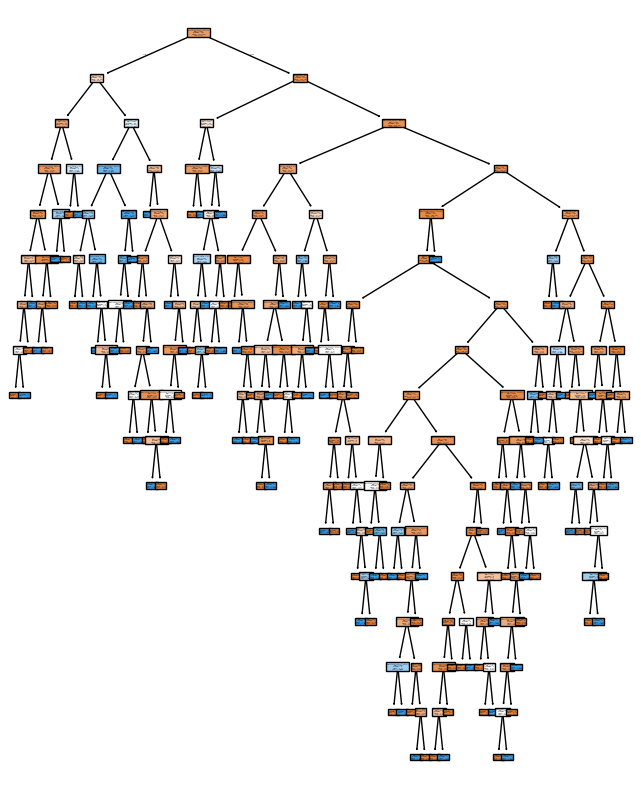

In [9]:
plt.figure(figsize=(8,10))
plot_tree(model,feature_names=["age","gender","department","education","education","experience_years","salary","marital_status","overtime","work_life_balance"],class_names=["play","no play"],filled=True)
plt.show()

In [14]:
data=pd.DataFrame({
    "age":["23"],
    "gender":["male"],
    "department":["Tech"],
    "education":["Master"],
    "experience_years":["1"],
    "salary":["82090"],
    "marital_status":["married"],
    "overtime":["yes"],
    "work_life_balance":["good"]

    

})
data["age"]=label.fit_transform(data["age"])
data["gender"]=label.fit_transform(data["gender"])
data["department"]=label.fit_transform(data["department"])
data["education"]=label.fit_transform(data["education"])
data["experience_years"]=label.fit_transform(data["experience_years"])
data["salary"]=label.fit_transform(data["salary"])
data["marital_status"]=label.fit_transform(data["marital_status"])
data["overtime"]=label.fit_transform(data["overtime"])
data["work_life_balance"]=label.fit_transform(data["work_life_balance"])



predict=model.predict(data)
predict


array([0])